# Assignment 2 - Scott Wilkinson (V00887986) 

## Question 1: PCA

A notebook which uses a KNN regression model to predict the time of merger of simulated galaxies from IllustrisTNG based on their non-parametric morphology data.

First, we must import the necessary Python packages.

In [1]:
# importing packages used in notebook
import numpy as np
import matplotlib.pyplot as plt
import pymysql, os

In [2]:
# BTW if you need a package installed, you can use the following

#import os
#os.system('pip install pymysql')

## Importing Morphology Data

I require the galaxy morphology that I computed to have not been flagged (flag_morph = 0).

Asymmetry < -1 is caused by too much sky noise. 

In [3]:
#Query SQL for morphology data
# connects to database
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
# select morphology params that have unflagged morphology fits
x = 'SELECT  * \
    FROM simCFIS_morph\
    WHERE flag_morph = 0\
    AND asymmetry > -1'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()

# save names as a string
names_morph = np.array(db_data, dtype = str).T[0]

# save rest of data as floats
morph = np.array(db_data, dtype = float).T[1:]

print(morph.shape)

(53, 219933)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
# fit on training set
scaler = MinMaxScaler().fit(morph)  

# normalize training
morph_norm = scaler.transform(morph) 

In [6]:
from sklearn.decomposition import PCA

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, 

In [7]:
n_components = 50
pca = PCA(n_components=n_components)

In [8]:
pca.fit(morph_norm.T)
morph_pca = pca.transform(morph_norm.T)

In [9]:
morph_pca.shape

(219933, 50)

(array([1.90000e+01, 2.50000e+01, 2.90000e+01, 3.20000e+01, 5.80000e+01,
        4.80000e+01, 7.40000e+01, 1.14000e+02, 2.18000e+02, 6.63000e+02,
        6.26000e+03, 1.42056e+05, 5.07550e+04, 1.12450e+04, 3.61400e+03,
        1.70900e+03, 9.44000e+02, 6.43000e+02, 4.71000e+02, 3.50000e+02,
        1.99000e+02, 1.53000e+02, 1.00000e+02, 7.30000e+01, 4.30000e+01,
        2.30000e+01, 6.00000e+00, 4.00000e+00, 4.00000e+00, 1.00000e+00]),
 array([-0.996229 , -0.9073607, -0.8184924, -0.7296241, -0.6407558,
        -0.5518875, -0.4630192, -0.3741509, -0.2852826, -0.1964143,
        -0.107546 , -0.0186777,  0.0701906,  0.1590589,  0.2479272,
         0.3367955,  0.4256638,  0.5145321,  0.6034004,  0.6922687,
         0.781137 ,  0.8700053,  0.9588736,  1.0477419,  1.1366102,
         1.2254785,  1.3143468,  1.4032151,  1.4920834,  1.5809517,
         1.66982  ]),
 <a list of 30 Patch objects>)

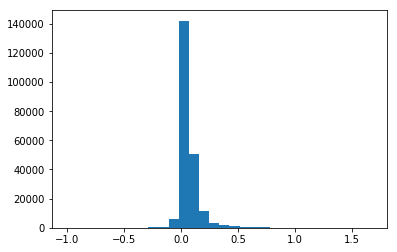

In [10]:
plt.hist(morph[0], bins = 30)

(array([7.0000e+00, 8.0000e+00, 5.7200e+02, 1.1639e+04, 2.3638e+04,
        2.5626e+04, 2.4019e+04, 1.7095e+04, 6.6720e+03, 4.7250e+03,
        4.7730e+03, 4.8800e+03, 5.0870e+03, 5.4920e+03, 5.6780e+03,
        5.7690e+03, 6.0710e+03, 6.1260e+03, 6.2100e+03, 6.3930e+03,
        6.4330e+03, 6.4900e+03, 6.4140e+03, 6.3980e+03, 6.1680e+03,
        5.7450e+03, 5.0540e+03, 3.9670e+03, 2.3570e+03, 4.2700e+02]),
 array([-1.26545896, -1.163311  , -1.06116305, -0.9590151 , -0.85686715,
        -0.75471919, -0.65257124, -0.55042329, -0.44827534, -0.34612738,
        -0.24397943, -0.14183148, -0.03968353,  0.06246443,  0.16461238,
         0.26676033,  0.36890828,  0.47105624,  0.57320419,  0.67535214,
         0.77750009,  0.87964805,  0.981796  ,  1.08394395,  1.1860919 ,
         1.28823986,  1.39038781,  1.49253576,  1.59468371,  1.69683167,
         1.79897962]),
 <a list of 30 Patch objects>)

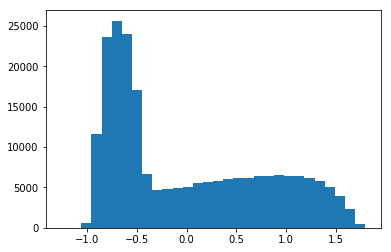

In [11]:
plt.hist(morph_pca.T[0], bins = 30)

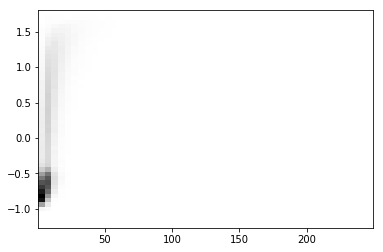

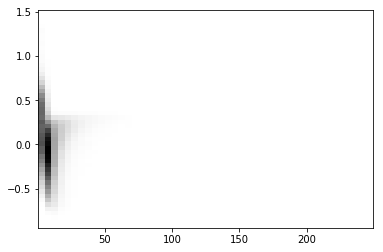

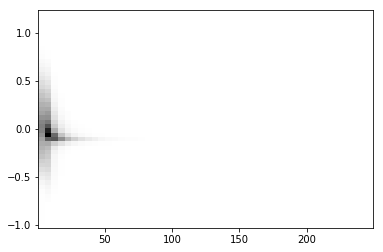

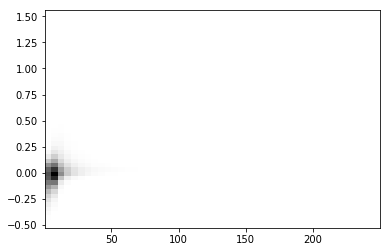

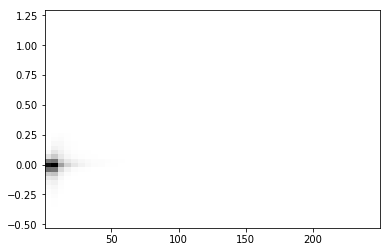

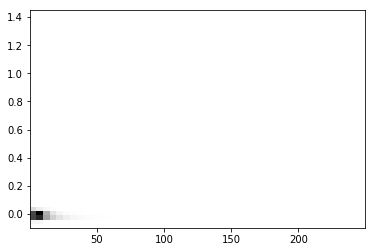

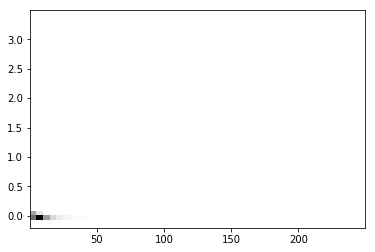

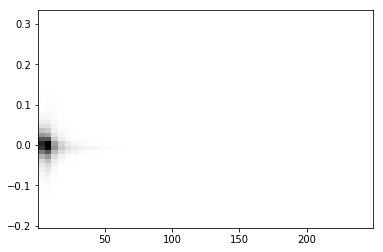

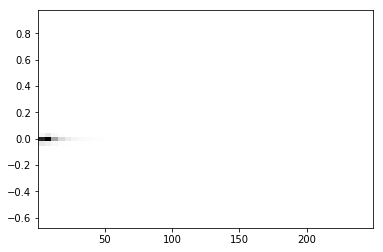

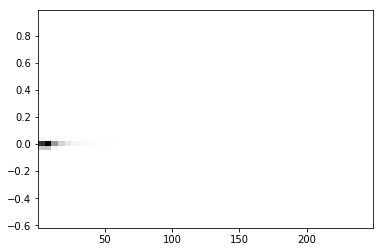

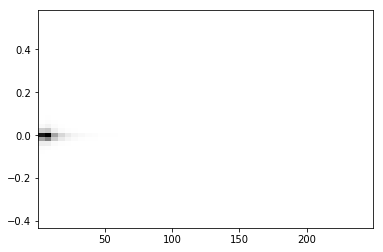

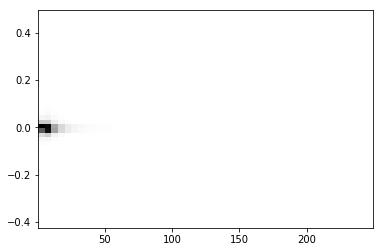

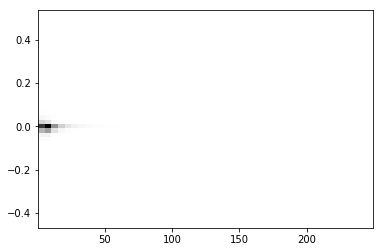

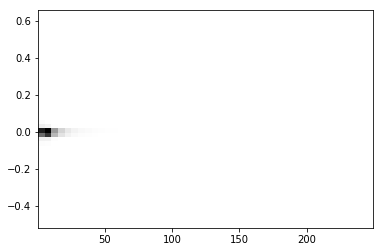

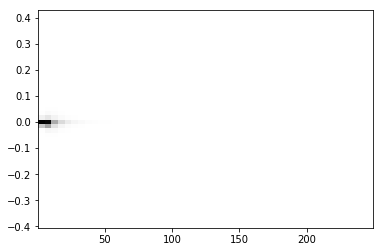

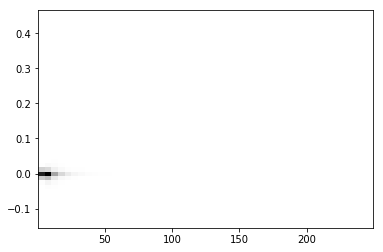

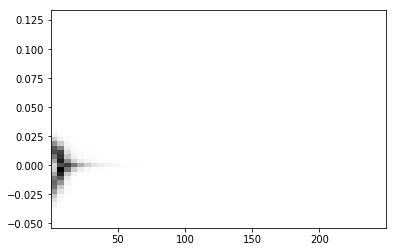

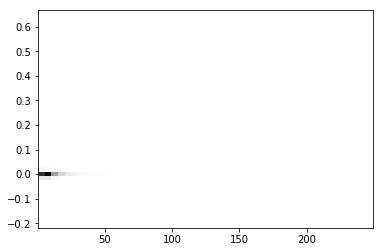

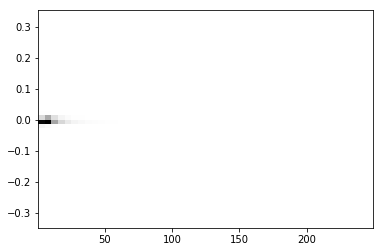

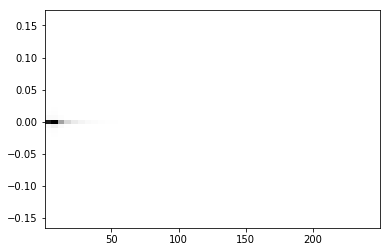

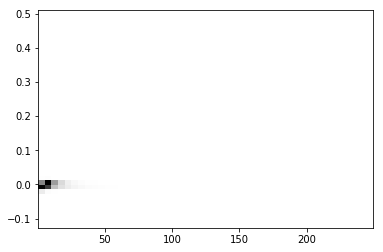

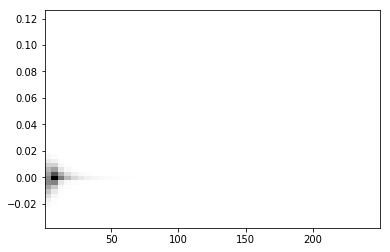

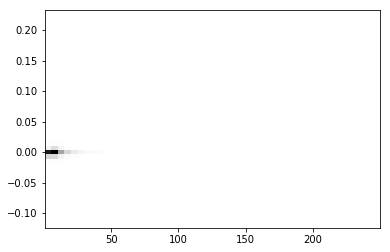

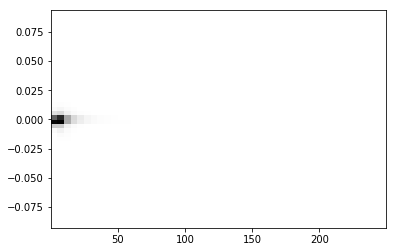

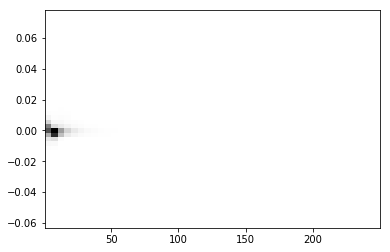

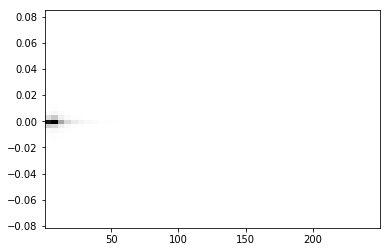

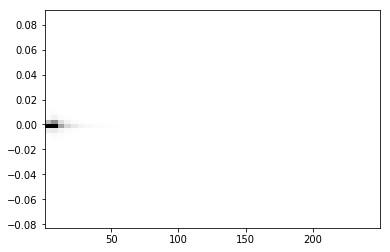

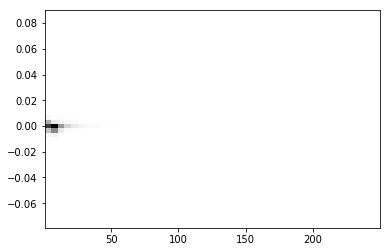

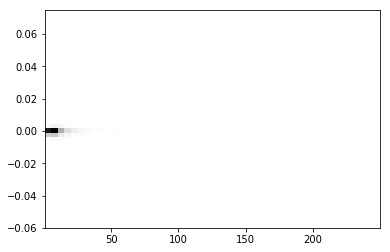

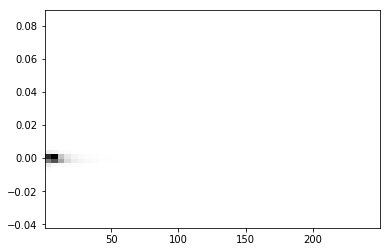

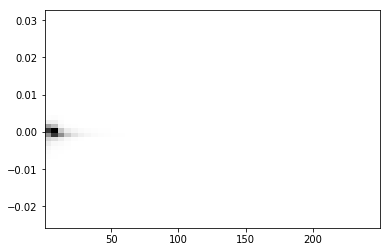

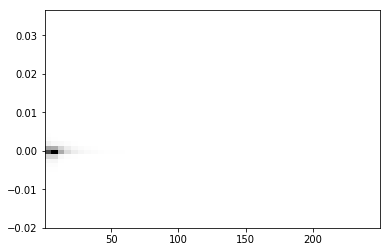

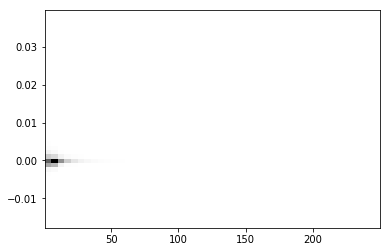

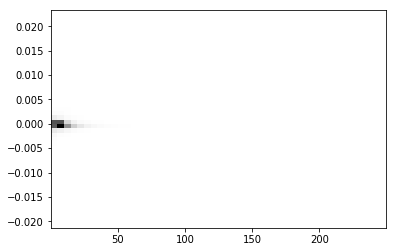

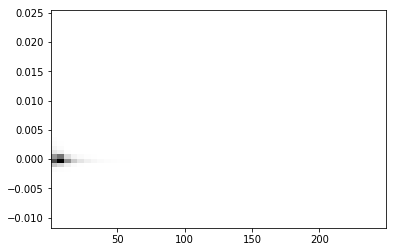

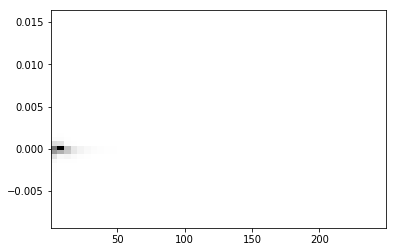

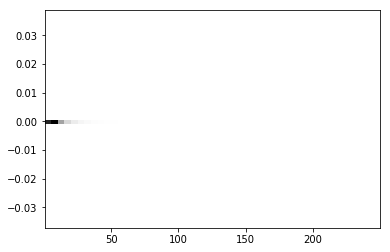

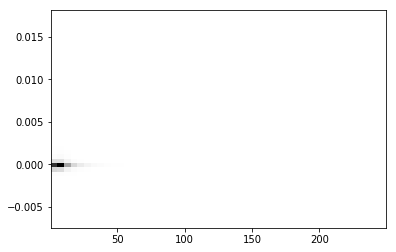

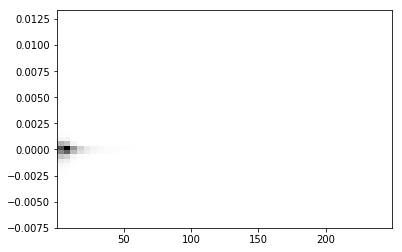

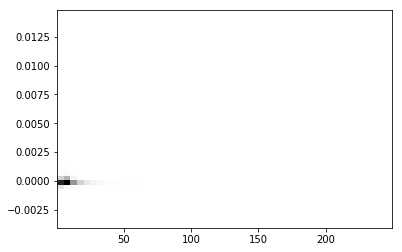

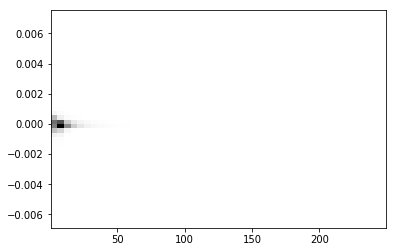

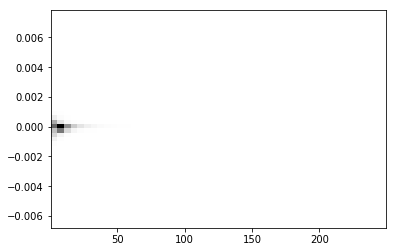

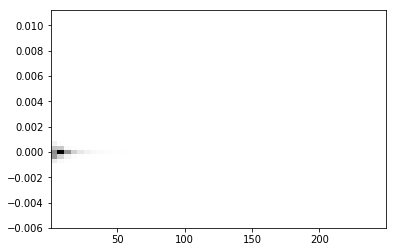

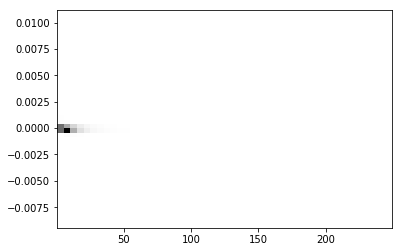

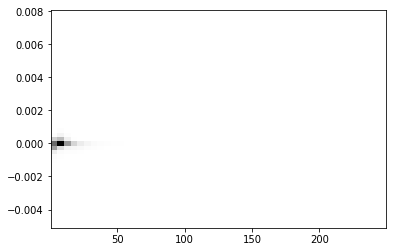

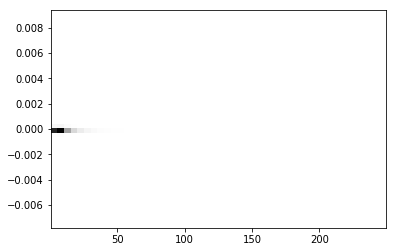

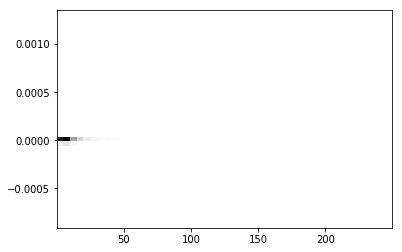

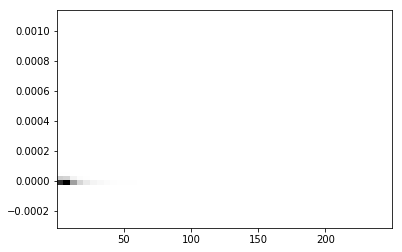

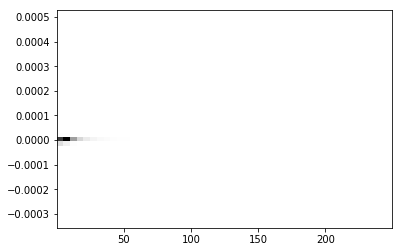

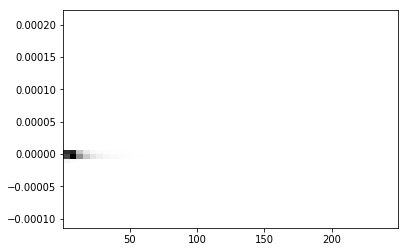

In [12]:
for i in range(n_components):
    plt.figure()
    plt.hist2d(morph[23], morph_pca.T[i], bins = 50, cmap = 'gray_r')
    plt.show()

In [13]:
#plt.hist(morph_pca.T[0], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Tum[idx] < 12], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Tum[idx] < 1], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Tum[idx] < 0.5], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Tum[idx] < 0.1], bins = 100)
plt.show()

NameError: name 'idx_morph' is not defined

In [ ]:
#plt.hist(morph_pca.T[0], bins = 100)
#plt.hist(morph_pca.T[0][idx_morph][Tpm[idx] < 12], bins = 100)
#plt.hist(morph_pca.T[0][idx_morph][Tpm[idx] < 1], bins = 100)
#plt.hist(morph_pca.T[0][idx_morph][Tpm[idx] < 0.5], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Tpm[idx] > 2], bins = 50, density = True)
plt.hist(morph_pca.T[0][idx_morph][(Tpm[idx] == 0) | (Tum[idx] == 0)], bins = 50, density = True, alpha = 0.5)
plt.hist(morph_pca.T[0][idx_morph][(Tpm[idx] == 0) & (Fpm[idx]==1)], bins = 50, density = True, alpha = 0.5)
plt.hist(morph_pca.T[0][idx_morph][(Tum[idx] == 0) & (Fum[idx]==1)], bins = 50, density = True, alpha = 0.5)
plt.show()

In [ ]:
plt.hist2d(morph_pca.T[0][idx_morph][(Tpm[idx]<2) & (Fpm[idx]==1)], Tpm[idx][(Tpm[idx]<2) & (Fpm[idx]==1)], cmap = 'gray_r', bins = 50)

In [ ]:
#plt.hist(morph_pca.T[0], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Mstar[idx] < 12], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Mstar[idx] < 11.5], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Mstar[idx] < 11], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Mstar[idx] < 10.5], bins = 100)
plt.hist(morph_pca.T[0][idx_morph][Mstar[idx] < 10.1], bins = 100)
plt.show()

In [ ]:
EV = pca.explained_variance_

In [ ]:
plt.plot(EV)

In [ ]:
plt.scatter(morph_pca.T[0][idx_morph], morph_pca.T[1][idx_morph], c = Tpm[idx], alpha = 0.2)
plt.colorbar()

In [ ]:
CEV = pca.explained_variance_ratio_
CEV

In [ ]:
plt.plot(np.cumsum(CEV))

# Merger Sample Selection

In [14]:
#Query MySQL with reasoning described above
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'IllustrisTNG100_1', user = 'swilkinson', passwd = '123Sdss!@#')
x ='SELECT e.DB_ID, e.Mstar, e.Tuntilmerger, e.MassRatiountilmerger, Tpostmerger, MassRatio, Flagpostmerger, Flaguntilmerger\
    FROM Environment e\
    WHERE snapNum>=50'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()

names_db = np.array(db_data, dtype = str).T[0]
Mstar = np.array(db_data, dtype = float).T[1]
Tum = np.array(db_data, dtype = float).T[2]
mu_pre = np.array(db_data, dtype = float).T[3]
Tpm = np.array(db_data, dtype = float).T[4]
mu_post = np.array(db_data, dtype = float).T[5]
Fum = np.array(db_data, dtype = float).T[6]
Fpm = np.array(db_data, dtype = float).T[7]


# give time before merger a negative value
#Tum_pre *= -1

# differentiate pre-merger galaxies that merge within the next snapshot from post-merger galaxies
#   that have merged within the last snap shot by adding / subtracting 0.1Gyr (approx the middle of a snapshot)
#Tum_pre[Tum_pre == 0] = -0.05

# add 0 to match formatting with morphology catalogue
names_db = np.array(['0'+n for n in names_db])

print('There are {} pre-merger galaxies.'.format(len(names_db)))

# match the two catalogues
match, idx_morph, idx = np.intersect1d(names_morph, names_db, return_indices = True)

print('There are {} pre-merger galaxies with flag-free morphology data.'.format(len(names_db[idx])))

There are 303110 pre-merger galaxies.
There are 219933 pre-merger galaxies with flag-free morphology data.


## Selecting a Sample of Pre-Merger Galaxies

Here is the reasoning behind my selection cuts:

1.  snap >= 50 requires z<1 in the simulation (ie. enough time for galaxies to form, evolve and begin to merge)
2. rsep > 0 requires there to be two merging galaxies that are not on top of each other yet
3. mass ratio > 0.1, the merger will be significant when it occurs
4. Flaguntilmerger = 1 ensures the merger is true and not a projection effect that confuses the `subfind` code (see Hani et al. 2020, Rodriguez-Gomez et al. 2015)
5. Tuntilmerger < 0.5 ensures the merger will happen soon (< 500 Myr) and the galaxies have begun to gravitationally interact
6. Tpostmerger > 0.5 ensures no recent has occurred that would cause the disturbed morphology

In [15]:
#Query MySQL with reasoning described above
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'IllustrisTNG100_1', user = 'swilkinson', passwd = '123Sdss!@#')
x ='SELECT e.DB_ID, e.Mstar, e.Tuntilmerger, e.MassRatiountilmerger\
    FROM Environment e \
    WHERE snapNum>=50\
    AND rsep>0 \
    AND MassRatiountilmerger>=0.1\
    AND Flaguntilmerger = 1\
    AND Tuntilmerger < 0.5\
    AND Tpostmerger > 0.5'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()

names_db_pre = np.array(db_data, dtype = str).T[0]
Mstar_pre = np.array(db_data, dtype = float).T[1]
Tum_pre = np.array(db_data, dtype = float).T[2]
mu_pre = np.array(db_data, dtype = float).T[3]

# give time before merger a negative value
Tum_pre *= -1

# differentiate pre-merger galaxies that merge within the next snapshot from post-merger galaxies
#   that have merged within the last snap shot by adding / subtracting 0.1Gyr (approx the middle of a snapshot)
Tum_pre[Tum_pre == 0] = -0.05

# add 0 to match formatting with morphology catalogue
names_db_pre = np.array(['0'+n for n in names_db_pre])

print('There are {} pre-merger galaxies.'.format(len(names_db_pre)))

# match the two catalogues
match, idx_morph_pre, idx_pre = np.intersect1d(names_morph, names_db_pre, return_indices = True)

print('There are {} pre-merger galaxies with flag-free morphology data.'.format(len(names_db_pre[idx_pre])))

There are 7322 pre-merger galaxies.
There are 2886 pre-merger galaxies with flag-free morphology data.


## Selecting a Sample of Post-Merger Galaxies

Here is the reasoning behind my selection cuts:

1. snap >= 50 requires z<1 in the simulation (ie. enough time for galaxies to form, evolve and begin to merge)
2. mass ratio > 0.1, the merger that occurred was significant
3. Flagpostmerger = 1 ensures the merger is true and not a projection effect that confuses the `subfind` code
4. Tpostmerger < 0.5 requires a merger to have occurred in the last 500 Myr
5. rsep > 25 and Tuntilmerger < 0.5 requires there to be no nearby galaxies about to cause another merger in the next 500 Myr

In [16]:
#Query MySQL with the reasoning listed above
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'IllustrisTNG100_1', user = 'swilkinson', passwd = '123Sdss!@#')
x ='SELECT e.DB_ID, e.Mstar, e.Tpostmerger, e.MassRatio\
    FROM Environment e \
    WHERE snapNum>=50\
    AND MassRatio>=0.1\
    AND Flagpostmerger = 1\
    AND Tpostmerger < 0.5\
    AND rsep>25\
    AND Tuntilmerger > 0.5'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()

names_db_post = np.array(db_data, dtype = str).T[0]
Mstar_post = np.array(db_data, dtype = float).T[1]
Tpm_post = np.array(db_data, dtype = float).T[2]
mu_post = np.array(db_data, dtype = float).T[3]

# add 0 to match formatting with morphology catalogue
names_db_post = np.array(['0'+n for n in names_db_post])

# differentiate pre-merger galaxies that merge within the next snapshot from post-merger galaxies
#   that have merged within the last snap shot by adding / subtracting 0.1Gyr (approx the middle of a snapshot)
Tpm_post[Tpm_post == 0] = 0.05

print('There are {} post-merger galaxies.'.format(len(names_db_post)))

# match with morphology catalogue
match, idx_morph_post, idx_post = np.intersect1d(names_morph, names_db_post, return_indices = True)

print('There are {} post-merger galaxies with flag-free morphology data.'.format(len(names_db_post[idx_post])))

names_db_post = names_db_post[idx_post]
Mstar_post = Mstar_post[idx_post]
Tpm_post = Tpm_post[idx_post]
mu_post = mu_post[idx_post]

There are 5153 post-merger galaxies.
There are 3456 post-merger galaxies with flag-free morphology data.


# Preparing Data for Model

In [17]:
# list of all merging galaxies
names_mergers = np.array(list(names_db_pre) + list(names_db_post))
T_merger = np.array(list(Tum_pre) + list(Tpm_post))
mu = np.array(list(mu_pre) + list(mu_post))
mass = np.array(list(Mstar_pre) + list(Mstar_post))

# match catalogues
match, idx_morph, idx_merge = np.intersect1d(names_morph, names_mergers, return_indices = True)

T_merger = T_merger[idx_merge]
mu = mu[idx_merge]
mass = mass[idx_merge]
morph = morph[:,idx_morph]

In [18]:
# shape of output
print(morph.shape)

(53, 6342)


In [19]:
# shape of output
print(T_merger.shape)

(6342,)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
# create training and validation sets (75/25 split)
input_tr,input_va,target_tr, target_va = train_test_split(morph.T, T_merger,test_size=0.25, shuffle = True)
#input_tr,input_va,target_tr, target_va = train_test_split(morph.T, mu, test_size=0.25, shuffle = True)
#input_tr,input_va,target_tr, target_va = train_test_split(morph.T, mass,test_size=0.25, shuffle = True)

In [22]:
### normalizing inputs

# fit on training set
scaler = MinMaxScaler().fit(input_tr)  

# normalize training
input_tr_norm= scaler.transform(input_tr) 

# normalize validation with same scaler & fit
input_va_norm= scaler.transform(input_va)

# K-Nearest Neighbours Regression

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

## Normalized Input Data

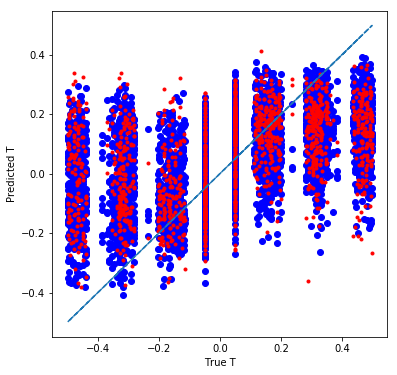

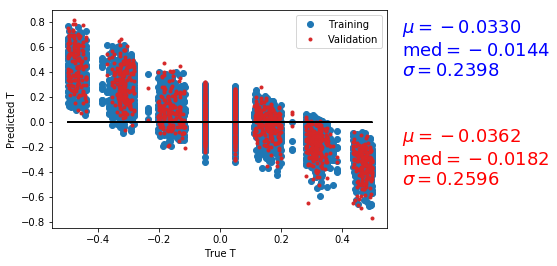

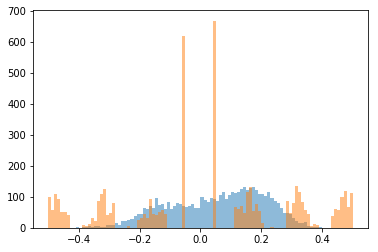

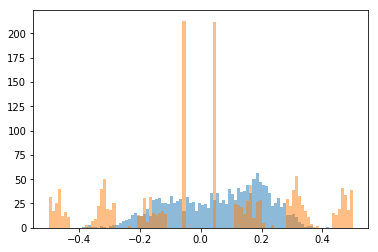

In [24]:
# define hyper parameters
KNN = KNeighborsRegressor(n_neighbors=10, p=2)

# fit the model with training set
KNN.fit(input_tr_norm,target_tr)  

#'predictions for training and validation sets'
target_tr_pred= KNN.predict(input_tr_norm)  
target_va_pred= KNN.predict(input_va_norm)

plt.figure(figsize = (6,6))
plt.plot(target_tr,target_tr_pred,'ob')
plt.plot(target_va,target_va_pred,'.r')
plt.plot(target_tr, target_tr, '--')
plt.xlabel('True T')
plt.ylabel('Predicted T')
plt.show()

plt.figure()
plt.plot(target_tr,target_tr_pred-target_tr,'o', color = 'tab:blue')
plt.plot(target_va,target_va_pred-target_va,'.', color = 'tab:red')
plt.plot(target_tr,np.zeros(len(target_tr)), '-k')
plt.xlabel('True T')
plt.ylabel('Predicted T')
plt.legend(['Training', 'Validation'])

mu = np.mean(target_tr-target_tr_pred)
median = np.median(target_tr-target_tr_pred)
sigma = np.std(target_tr-target_tr_pred)

muv = np.mean(target_va-target_va_pred)
medianv = np.median(target_va-target_va_pred)
sigmav = np.std(target_va-target_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)

plt.text(1.2*max(target_tr),0.5*max(target_va-target_va_pred),textstr, color='b',fontsize=18)
plt.text(1.2*max(target_tr),0.6*min(target_va-target_va_pred),textstrv, color='r',fontsize=18)

plt.show()

plt.show()
plt.hist(target_tr_pred, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.hist(target_tr, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.show()

plt.show()
plt.hist(target_va_pred, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.hist(target_va, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.show()

In [25]:
param_grid = [{"n_neighbors":np.arange(1,100) , "p":[1,2]}]

gs = GridSearchCV(KNN, param_grid, cv=5)

gs.fit(input_tr_norm, target_tr)

gs.best_params_

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in N

{'n_neighbors': 33, 'p': 2}

In [ ]:
# creating a pipeline:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn_pipe = Pipeline(["Scaler": StandardScaler(), ])

## UN-Normalized Input Data

In [ ]:
# define hyper parameters
KNN = KNeighborsRegressor(n_neighbors=10, p=2)

# fit the model with training set
KNN.fit(input_tr,target_tr)  

#'predictions for training and validation sets'
target_tr_pred= KNN.predict(input_tr)  
target_va_pred= KNN.predict(input_va)

plt.figure(figsize = (6,6))
plt.plot(target_tr,target_tr_pred,'ob')
plt.plot(target_va,target_va_pred,'.r')
plt.plot(target_tr, target_tr, '--')
plt.xlabel('True T')
plt.ylabel('Predicted T')
plt.show()

plt.figure()
plt.plot(target_tr,target_tr_pred-target_tr,'o', color = 'tab:blue')
plt.plot(target_va,target_va_pred-target_va,'.', color = 'tab:red')
plt.plot(target_tr,np.zeros(len(target_tr)), '-k')
plt.xlabel('True T')
plt.ylabel('Predicted T')
plt.legend(['Training', 'Validation'])

mu = np.mean(target_tr-target_tr_pred)
median = np.median(target_tr-target_tr_pred)
sigma = np.std(target_tr-target_tr_pred)

muv = np.mean(target_va-target_va_pred)
medianv = np.median(target_va-target_va_pred)
sigmav = np.std(target_va-target_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)

plt.text(1.2*max(target_tr),0.5*max(target_va-target_va_pred),textstr, color='b',fontsize=18)
plt.text(1.2*max(target_tr),0.6*min(target_va-target_va_pred),textstrv, color='r',fontsize=18)

plt.show()

plt.show()
plt.hist(target_tr_pred, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.hist(target_tr, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.show()

plt.show()
plt.hist(target_va_pred, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.hist(target_va, bins = 100, range = [-0.5,0.5], alpha = 0.5)
plt.show()